# Exercice à faire (sur papier)

Pour les deux premiers exercices, vous aurez besoin d'utiliser la règle de Bayes. Il découle de l'égalité suivante: 
$$ P(X=x,Y=y) = P(X=x)P(Y=y|X=x) = P(Y=y)P(X=x|Y=y).$$
De cette égalité, il est possible de déduire la règle de Bayes:
$$ P(Y=y|X=x) = \frac{P(Y=y)P(X=x|Y=y)}{P(X=x)}.$$
De plus souvenons-nous que:
$$ P(X=x) = \sum_{y\in\omega_Y} P(X=x,Y=y) = \sum_{y\in\omega_Y} P(X=x|Y=y)P(Y=y).$$



## Critique de film

Pour aller voir un film, dois-je me baser sur l'avis de mon critique préféré (ou ami facebook)
* Notons Y mon avis et X l'avis du critique sous forme de VA, par exemple Y=1 si mon avis est positif, et Y=0 sinon).
* Ce critique est fiable à 95% :
    * fait 1 : 95% des films que j'ai aimé sont recommandés par le
        critique et 
    * fait 2 : 95% des films que je n'ai pas aimés sont déconseillés par le critique     
* fait 3: J'aime seulement 1% des films qui sortent


La critique de mon ami arrive, elle est positive **Quel est la probabilité que j'aime ce film ?**

Pour répondre à cette question, les étapes suivantes sont proposées : 
* Définir les espaces de réalisation de $X$ et $Y$. 
* Quelle probabilité cherche-t-on ? 
* Comment traduire le fait 1 en terme de probabilité conditionnelle ? 
* Comment traduire le fait 2 en terme de probabilité conditionnelle ? 
* Comment traduire le fait 3 en terme de probabilité  ? 
* Finir le calcul. 




## Les cookies 
Supposons 2 bols de cookies:
* le bol 1 contient 30 cookies à la vanille et 10 au chocolat
* le bol 2 en contient 20 de chaque


Supposons que l’on choisisse un bol au hasard et à l’aveugle, et qu’on y pioche un cookie. Il est à la vanille. **Quelle est la probabilité qu’il vienne du bol 1 ?**


# Données MNIST 

Le but de ce TP est de se familiariser avec les données MNIST (voir [cette page](https://perso.limsi.fr/Individu/allauzen/webpages/pmwiki.php?n=Cours.Main#toc6)). Elles sont également accessible en lecture et en local: 

    /partage/public/allauzen
    
Ce corpus rassemble des images (observations) de chiffres isolés et manuscrits ainsi que les classes associées (les labels ou les réponses attendues). Il s'agit donc d'un problème de classification à 10 classes (de 0 à 9). L'objectif est d'assigner le bon chiffre à une image.
## Chargement des données

/home/tp-home004/tperrau/IAA/proba/5TP
50000 training examples


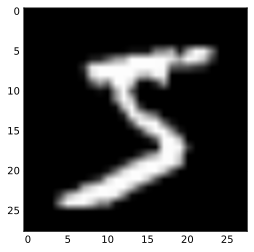

In [7]:
import cPickle, gzip, numpy, os

print os.getcwd()
# Load the dataset
f = gzip.open(os.getcwd() + "/mnist.pkl.gz", 'rb')

train_set, valid_set, test_set = cPickle.load(f)

print str(len(train_set[0]))+" training examples"
f.close()
# exemple: 
im = train_set[0][0] # the first image
label = train_set[1][0] # its label

%matplotlib inline
%config InlineBackend.figure_formats=['svg']
%config InlineBackend.figure_format = 'svg'
import matplotlib
# Visualisation d'une image: 
im = train_set[0][0]
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(im.reshape(28,28) , matplotlib.pyplot.cm.gray)

## Manipulation des données
Voici quelques exemples de manipulation. 

In [8]:
# Récupération des images et des labels
images = train_set[0]
labels = train_set[1]
print "shape d'images  :"+str(images.shape)
print "shape de labels :"+str(labels.shape)
# Combien y-a-t-il d'images de 5 
print "Nombre d'images dont le label est 5 :"+str((labels==5).sum())
# labels==5 retourne un ndarray de même dimension que labels mais remplit de boolean.
# True, si le label de la case est 5 et False sinon. 
# On peut se servir de cet ndarray pour faire du slicing de images
fives=images[labels==5]
print "fives contient toutes les images dont le label est 5, il y en a :"+str(fives.shape)

shape d'images  :(50000, 784)
shape de labels :(50000,)
Nombre d'images dont le label est 5 :4506
fives contient toutes les images dont le label est 5, il y en a :(4506, 784)


## Statistique et visualisation
Une image est un ensemble de pixel. Chaque pixel est considéré comme la réalisation d'une variable aléatoire réelle. Prenons les données d'apprentissage.

Chaque pixel est une VA continue. Il est alors possible de représenter la distribution sur l'ensemble des pixels d'une image via des Gaussienne. Une image est alors un ensemble de VAs (une VA par pixel). 

* Pour chaque classe, calculer l'image moyenne. 
* Si nous considérons que chaque pixel est indépendant des autres, quelle forme prend la matrice de covariance et comment peut-on la représenter (quelle structure de données) ? 
* Calculer la variance de chaque pixel pour chaque classe. 
* Visualiser pour chaque classe : le vecteur moyen puis dans un second temps la variance des pixels. 

classe 0


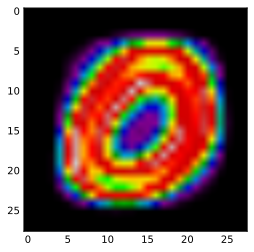

classe 1


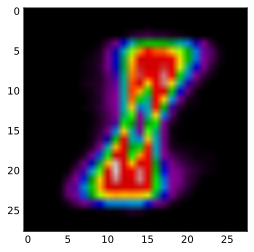

classe 2


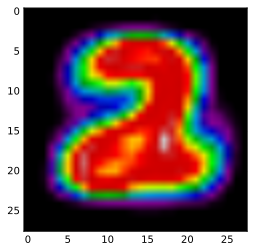

classe 3


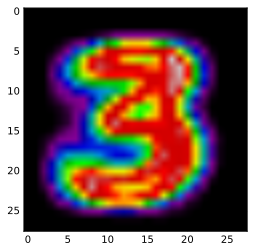

classe 4


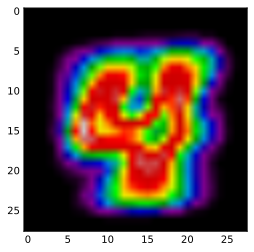

classe 5


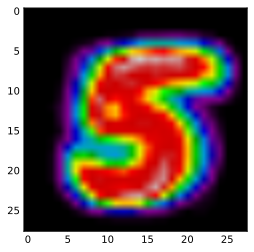

classe 6


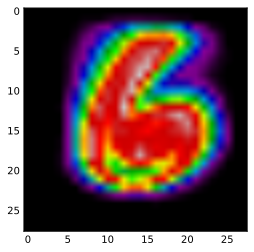

classe 7


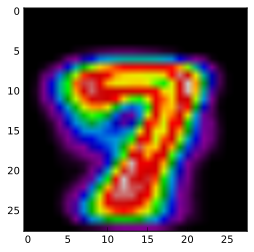

classe 8


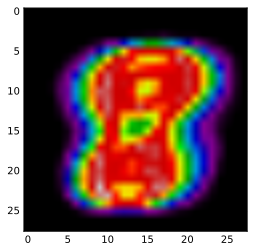

classe 9


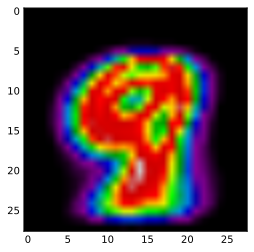

In [9]:
means = list()
variances = list()
for i in range(10):
    mesImages = images[labels==i] # Les images de la classe i
    #Calcul moyen
    mean = mesImages.mean(axis=0)
    means.append(mean)
    var = mesImages.var(axis=0)
    variances.append(var)
    #Affichage
    print "classe", i
    matplotlib.pyplot.imshow(var.reshape(28, 28), matplotlib.pyplot.cm.spectral)
    matplotlib.pyplot.show()